<a href="https://colab.research.google.com/github/gabychoi/comment-clean-bot/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import warnings

warnings.filterwarnings('ignore')

In [111]:
import pandas as pd
import numpy as np 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [112]:
import glob
import re

from tqdm import tqdm_notebook

In [113]:
# ÌÅ¨Î°§ÎßÅÌïú Ï†ÑÏ≤¥ ÎåìÍ∏Ä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
raw_data = pd.read_csv('/content/gdrive/My Drive/eda_data/repl_data.csv')

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
len(raw_data)

127125

In [114]:
repl_data = raw_data.drop_duplicates(subset='ÎåìÍ∏Ä', keep='first', inplace=False)

# Ï§ëÎ≥µ Ï†úÍ±∞ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
len(repl_data)

119000

In [115]:
# Ï†ïÍ∑úÌëúÌòÑÏãù Ï†ÑÍ≥º ÌõÑÎ•º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ ÏÑ∏Î°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
preprocessing_df = repl_data.copy()
preprocessing_df.head()

Unnamed: 0  ...                               Ï∂úÏ≤ò
0           0  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
1           1  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
2           2  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
3           3  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv
4           4  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv

[5 rows x 4 columns]

ÏïÖÏÑ± ÎåìÍ∏Ä ÌïÑÌÑ∞ÎßÅ - ÎùºÎ≤®2

In [116]:
preprocessing_df = preprocessing_df['ÎåìÍ∏Ä']

In [117]:
preprocessing_df = pd.DataFrame(preprocessing_df)
preprocessing_df['ÏïÖÌîåÏó¨Î∂Ä'] = np.NaN
preprocessing_df.head()

ÎåìÍ∏Ä  ÏïÖÌîåÏó¨Î∂Ä
0                                                  üó£   NaN
1  Ïã¨Í∞ÅÌóàÎã§,, Î≤ïÏïà Í≤ÄÌÜ†ÎèÑ Ïïà ÌïòÎäî ÏùòÏõêÎì§ ÎÇ¥ ÏÑ∏Í∏àÏúºÎ°ú Ìò∏ÏùòÌò∏Ïãù ÌïúÎã§ ÏÉùÍ∞ÅÌïòÎãàÍπå Ïó¥Î∞õ...   NaN
2  Ï∞®ÎèÑÏóêÏÑú 25kmÏ†úÌïú Îë† Ïñ¥Ï©åÏûêÎäîÍ±¥ÏßÄ ÏûêÏ†ÑÍ±∞ Ïò§ÌÜ†Î∞îÏù¥ÎèÑ Í∑∏Í±∞Î≥¥Îã§ Îπ†Î•¥Îã§ Ïù∏ÎèÑ, Ï∞®ÎèÑ...   NaN
3                                Íµ≠ÌöåÏùòÏõêÏßÅ Îã§ Î∞ïÌÉàÌñàÏúºÎ©¥ Ï¢ãÍ≤†ÎÑ§„Ö†„Ö†   NaN
4                                 Ìëú ÏñªÏùÑ ÏÉùÍ∞Å ÎßêÍ≥† Î≤ïÏùÑ ÎßåÎì§Ïñ¥Îùº   NaN

In [118]:
filter_word_df = pd.read_excel('/content/gdrive/My Drive/eda_data/ÌïÑÌÑ∞ÎßÅÎã®Ïñ¥.xlsx')

In [119]:
filter_word_df.shape[1]

13

In [120]:
preprocessing_df['ÎåìÍ∏Ä'].dropna()

0                                                         üó£
1         Ïã¨Í∞ÅÌóàÎã§,, Î≤ïÏïà Í≤ÄÌÜ†ÎèÑ Ïïà ÌïòÎäî ÏùòÏõêÎì§ ÎÇ¥ ÏÑ∏Í∏àÏúºÎ°ú Ìò∏ÏùòÌò∏Ïãù ÌïúÎã§ ÏÉùÍ∞ÅÌïòÎãàÍπå Ïó¥Î∞õ...
2         Ï∞®ÎèÑÏóêÏÑú 25kmÏ†úÌïú Îë† Ïñ¥Ï©åÏûêÎäîÍ±¥ÏßÄ ÏûêÏ†ÑÍ±∞ Ïò§ÌÜ†Î∞îÏù¥ÎèÑ Í∑∏Í±∞Î≥¥Îã§ Îπ†Î•¥Îã§ Ïù∏ÎèÑ, Ï∞®ÎèÑ...
3                                       Íµ≠ÌöåÏùòÏõêÏßÅ Îã§ Î∞ïÌÉàÌñàÏúºÎ©¥ Ï¢ãÍ≤†ÎÑ§„Ö†„Ö†
4                                        Ìëú ÏñªÏùÑ ÏÉùÍ∞Å ÎßêÍ≥† Î≤ïÏùÑ ÎßåÎì§Ïñ¥Îùº
                                ...                        
127120                                           üáßüáªüá∞üá∑‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è
127121                             Ïù¥Í±¥... ÌôçÎßàÎã¥ÏóêÏÑú Íµ¨ÏûÖ Î™ªÌïòÎÇòÏöî? „Öé„Öé„Öé
127122                                           ÎäêÎ¨¥ ÏûòÎ®πÎäî Ïòà 9
127123                              ÎßõÏûàÎäîÍ±¥ ÎààÏúºÎ°úÎßå Î¥êÎèÑ ÏïåÏ£†,ÎßõÏûàÍ≤å ÎìúÏÑ∏Ïöî
127124                                               üëèüëèüëèüòÇüòÇüòÇ
Name: ÎåìÍ∏Ä, Length: 11899

In [121]:
preprocessing_df = preprocessing_df.loc[preprocessing_df['ÎåìÍ∏Ä'].notnull(), ]

In [122]:
for col in tqdm_notebook(range(filter_word_df.shape[1])):
    word_list = list(filter_word_df.iloc[:, col])[0].split(', ')
    label = filter_word_df.columns[col][-2]

    for filter_word in tqdm_notebook(word_list):
        preprocessing_df.loc[ preprocessing_df['ÎåìÍ∏Ä'].str.match('.*' + filter_word + '.*'), 'ÏïÖÌîåÏó¨Î∂Ä' ] = label

In [123]:
# ÏïÖÌîå ÎùºÎ≤®ÎßÅÎêú Í∞úÏàò
preprocessing_df.head()

ÎåìÍ∏Ä ÏïÖÌîåÏó¨Î∂Ä
0                                                  üó£  NaN
1  Ïã¨Í∞ÅÌóàÎã§,, Î≤ïÏïà Í≤ÄÌÜ†ÎèÑ Ïïà ÌïòÎäî ÏùòÏõêÎì§ ÎÇ¥ ÏÑ∏Í∏àÏúºÎ°ú Ìò∏ÏùòÌò∏Ïãù ÌïúÎã§ ÏÉùÍ∞ÅÌïòÎãàÍπå Ïó¥Î∞õ...  NaN
2  Ï∞®ÎèÑÏóêÏÑú 25kmÏ†úÌïú Îë† Ïñ¥Ï©åÏûêÎäîÍ±¥ÏßÄ ÏûêÏ†ÑÍ±∞ Ïò§ÌÜ†Î∞îÏù¥ÎèÑ Í∑∏Í±∞Î≥¥Îã§ Îπ†Î•¥Îã§ Ïù∏ÎèÑ, Ï∞®ÎèÑ...  NaN
3                                Íµ≠ÌöåÏùòÏõêÏßÅ Îã§ Î∞ïÌÉàÌñàÏúºÎ©¥ Ï¢ãÍ≤†ÎÑ§„Ö†„Ö†  NaN
4                                 Ìëú ÏñªÏùÑ ÏÉùÍ∞Å ÎßêÍ≥† Î≤ïÏùÑ ÎßåÎì§Ïñ¥Îùº  NaN

In [125]:
bad_comment = preprocessing_df[preprocessing_df['ÏïÖÌîåÏó¨Î∂Ä'] == '2']
bad_comment.head()

ÎåìÍ∏Ä ÏïÖÌîåÏó¨Î∂Ä
103                    ÏßÄÎûÑÏùÑ ÌïúÎã§!! Ïó≠Í≤©Î¶¨ Í≥†ÎßôÎã§~~!!    2
119               @dmsgddl ÏßÄÎÑ§ÎïåÎ¨∏Ïóê Ïò®ÎÇòÎùºÍ∞Ä ÏßÄÎûÑÎÇ´ÎäîÎç∞    2
130                             Ïß±Í∫ÑÎÇò Ï™ΩÎ∞îÎ¶¨ÎÇò...    2
161                                    ÏßÄÎûÑÌïòÎÑ§    2
174  ÏßÄÎûÑÌïúÎã§,ÎØ∏ÏÑ∏Î®ºÏßÄÎÇò Ïû°ÏïÑÎùº Ï§ëÍµ≠Ïóê ÎßêÎèÑ Î™ªÌïòÎ©¥ÏÑú ÎßêÏùÄ ÏûòÎèÑ Ïî®Î∂ÄÎ¶∞Îã§.    2

In [ ]:
# ÎåìÍ∏Ä Í∏∏Ïù¥ ÌôïÏù∏
repl_data['ÎåìÍ∏ÄÍ∏∏Ïù¥'] = repl_data['ÎåìÍ∏Ä'].apply(lambda x : len(str(x)))

repl_data['ÎåìÍ∏ÄÍ∏∏Ïù¥'].max()

2229

In [ ]:
# ÎåìÍ∏ÄÍ∏∏Ïù¥ ÏãúÍ∞ÅÌôî

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
len_int = repl_data['ÎåìÍ∏ÄÍ∏∏Ïù¥'].astype(int)
len_sort = len_int.sort_values()
sort_df = pd.DataFrame(len_sort)

len_count = pd.DataFrame(sort_df.groupby(['ÎåìÍ∏ÄÍ∏∏Ïù¥']).size())
len_count.columns = ['ÎåìÍ∏ÄÍ∞úÏàò']
len_count



ÎåìÍ∏ÄÍ∞úÏàò
ÎåìÍ∏ÄÍ∏∏Ïù¥      
1     1468
2     1779
3     1889
4     1669
5     2117
...    ...
1931     1
1958     1
2071     1
2190     1
2229     1

[835 rows x 1 columns]

In [ ]:
len_count.reset_index(level=0, inplace=True)

In [ ]:
len_count

ÎåìÍ∏ÄÍ∏∏Ïù¥  ÎåìÍ∏ÄÍ∞úÏàò
0       1  1468
1       2  1779
2       3  1889
3       4  1669
4       5  2117
..    ...   ...
830  1931     1
831  1958     1
832  2071     1
833  2190     1
834  2229     1

[835 rows x 2 columns]

In [ ]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ Î¨∏Ï†ú Ìï¥Í≤∞
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

Unknown system... sorry~~~~


In [ ]:
import matplotlib as mpl
%matplotlib inline

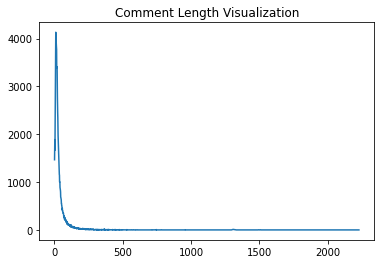

In [ ]:
plt.title('Comment Length Visualization')
plt.plot(len_count['ÎåìÍ∏ÄÍ∏∏Ïù¥'], len_count['ÎåìÍ∏ÄÍ∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
# plt.xlabel('ÎåìÍ∏ÄÍ∏∏Ïù¥')
# plt.ylabel('ÎåìÍ∏ÄÍ∞úÏàò')
plt.show()

In [ ]:
len_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ÎåìÍ∏ÄÍ∏∏Ïù¥    835 non-null    int64
 1   ÎåìÍ∏ÄÍ∞úÏàò    835 non-null    int64
dtypes: int64(2)
memory usage: 13.2 KB


In [ ]:
repl_data

Unnamed: 0  Unnamed: 0.1  ...                               Ï∂úÏ≤ò ÎåìÍ∏ÄÍ∏∏Ïù¥
0                0             0  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv    1
1                1             1  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv   66
2                2             2  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv  137
3                3             3  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv   19
4                4             4  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv   18
...            ...           ...  ...                              ...  ...
127120         968           968  ...                   ./data\ÌôçÏÑùÏ≤ú.csv   10
127121         969           969  ...                   ./data\ÌôçÏÑùÏ≤ú.csv   24
127122         970           970  ...                   ./data\ÌôçÏÑùÏ≤ú.csv   10
127123         971           971  ...                   ./data\ÌôçÏÑùÏ≤ú.csv   23
127124         972           972  ...                   ./data\ÌôçÏÑùÏ≤ú.csv    6

[127125 rows x 5 columns]

In [ ]:
# ÎåìÍ∏ÄÍ∏∏Ïù¥ 300Ïù¥ÏÉÅ 500Ïù¥Ìïò
repl_data = repl_data[(repl_data['ÎåìÍ∏ÄÍ∏∏Ïù¥'] <= 500) & (repl_data['ÎåìÍ∏ÄÍ∏∏Ïù¥'] >= 300)]
repl_data

Unnamed: 0  Unnamed: 0.1  ...                               Ï∂úÏ≤ò ÎåìÍ∏ÄÍ∏∏Ïù¥
20              20            20  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv  444
21              21            21  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv  369
23              23            23  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv  426
616            616           616  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv  365
617            617           617  ...  ./data\JTBCNEWS_Ïù∏Ïä§ÌÉÄ_ÎåìÍ∏Ä_1116.csv  365
...            ...           ...  ...                              ...  ...
124827         458           458  ...                   ./data\Ìï®ÏÜåÏõê.csv  349
125068         699           699  ...                   ./data\Ìï®ÏÜåÏõê.csv  400
125073         704           704  ...                   ./data\Ìï®ÏÜåÏõê.csv  319
126620         468           468  ...                   ./data\ÌôçÏÑùÏ≤ú.csv  327
126720         568           568  ...                   ./data\ÌôçÏÑùÏ≤ú.csv  335

[855 rows x 5 columns]

In [ ]:
len_int = repl_data['ÎåìÍ∏ÄÍ∏∏Ïù¥'].astype(int)
len_sort = len_int.sort_values()
sort_df = pd.DataFrame(len_sort)

len_count = pd.DataFrame(sort_df.groupby(['ÎåìÍ∏ÄÍ∏∏Ïù¥']).size())
len_count.columns = ['ÎåìÍ∏ÄÍ∞úÏàò']
len_count


ÎåìÍ∏ÄÍ∞úÏàò
ÎåìÍ∏ÄÍ∏∏Ïù¥      
300     11
301      7
302      5
303      7
304      7
...    ...
496      2
497      2
498      3
499      1
500      4

[193 rows x 1 columns]

In [ ]:
len_count.reset_index(level=0, inplace=True)

In [ ]:
len_count.head()

ÎåìÍ∏ÄÍ∏∏Ïù¥  ÎåìÍ∏ÄÍ∞úÏàò
0     300    11
1     301     7
2     302     5
3     303     7
4     304     7
..    ...   ...
188   496     2
189   497     2
190   498     3
191   499     1
192   500     4

[193 rows x 2 columns]

In [ ]:
plt.title('Comment Length Visualization')
plt.plot(len_count['ÎåìÍ∏ÄÍ∏∏Ïù¥'], len_count['ÎåìÍ∏ÄÍ∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
# plt.xlabel('ÎåìÍ∏ÄÍ∏∏Ïù¥')
# plt.ylabel('ÎåìÍ∏ÄÍ∞úÏàò')
plt.show()

In [ ]:
# ÏïÖÌîå ÎåìÍ∏Ä Í∏∏Ïù¥ ÏãúÍ∞ÅÌôî
dict_label = pd.read_csv('/content/gdrive/My Drive/eda_data/dict_label.csv')

In [ ]:
dict_label['ÎåìÍ∏ÄÍ∏∏Ïù¥'] = dict_label['ÎåìÍ∏Ä'].apply(lambda x : len(str(x)))

In [ ]:
# ÏïÖÌîå ÏµúÎåÄ ÎåìÍ∏Ä Í∏∏Ïù¥
dict_label['ÎåìÍ∏ÄÍ∏∏Ïù¥'].max()

385

In [47]:
dict_label.head()
dict_bad = dict_label[(dict_label['ÏïÖÌîåÏó¨Î∂Ä'] == 2) | (dict_label['ÏïÖÌîåÏó¨Î∂Ä'] == 1)]
dict_bad

Unnamed: 0  ... ÎåìÍ∏ÄÍ∏∏Ïù¥
0             75  ...   14
1             86  ...   16
2             95  ...    8
3            122  ...   36
4            178  ...   22
...          ...  ...  ...
8578       89851  ...   27
8579       90081  ...   71
8580       90946  ...   84
8581       91211  ...   57
8582       91275  ...   11

[8583 rows x 5 columns]

In [53]:
dict_int = dict_bad['ÎåìÍ∏ÄÍ∏∏Ïù¥'].astype(int)
dict_int
dict_sort = dict_int.sort_values()
dict_df = pd.DataFrame(dict_sort)
dict_df
dict_count = pd.DataFrame(dict_df.groupby(['ÎåìÍ∏ÄÍ∏∏Ïù¥']).size())
dict_count


0
ÎåìÍ∏ÄÍ∏∏Ïù¥    
4      7
5     33
6     40
7     95
8     87
...   ..
366    1
369    1
373    1
375    1
385    2

[341 rows x 1 columns]

In [54]:
dict_count.columns = ['ÎåìÍ∏ÄÍ∞úÏàò']
dict_count.head()

ÎåìÍ∏ÄÍ∞úÏàò
ÎåìÍ∏ÄÍ∏∏Ïù¥      
4        7
5       33
6       40
7       95
8       87

In [55]:
dict_count.reset_index(level=0, inplace=True)
dict_count.head()

ÎåìÍ∏ÄÍ∏∏Ïù¥  ÎåìÍ∏ÄÍ∞úÏàò
0     4     7
1     5    33
2     6    40
3     7    95
4     8    87

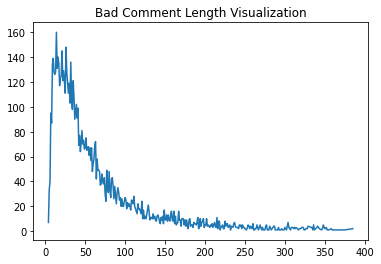

In [60]:
plt.title('Bad Comment Length Visualization')
plt.plot(dict_count['ÎåìÍ∏ÄÍ∏∏Ïù¥'], dict_count['ÎåìÍ∏ÄÍ∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
# plt.xlabel('ÎåìÍ∏ÄÍ∏∏Ïù¥')
# plt.ylabel('ÎåìÍ∏ÄÍ∞úÏàò')
plt.show()

In [ ]:
# Ïö∞Î¶¨Í∞Ä ÎßåÎì† ÏïÖÌîå Î≠âÏπòÎ°ú ÎùºÎ≤®ÎßÅ ÏãúÍ∞ÅÌôî

In [109]:
dict_label2 = pd.read_csv('/content/gdrive/My Drive/eda_data/dict_label.csv')
dict_label2 = dict_label.groupby(['ÏïÖÌîåÏó¨Î∂Ä']).size()
dict_label2_df = pd.DataFrame(dict_label2)
dict_label2_df.columns = ['Í∞úÏàò']
dict_label2_df.head()

Í∞úÏàò
ÏïÖÌîåÏó¨Î∂Ä      
1     2620
2     5963

In [110]:
dict_label2_df.index = ['ÏïÖÏÑ±ÏúÑÌóòÎåìÍ∏Ä(1)', 'ÏïÖÏÑ±ÎåìÍ∏Ä(2)']
dict_label2_df.head()

Í∞úÏàò
ÏïÖÏÑ±ÏúÑÌóòÎåìÍ∏Ä(1)  2620
ÏïÖÏÑ±ÎåìÍ∏Ä(2)    5963

In [112]:
dict_label2_df.reset_index(level=0, inplace=True)

In [115]:
dict_label2_df.columns = ['ÎåìÍ∏ÄÎ∂ÑÎ•ò', 'Í∞úÏàò']
dict_label2_df.head()

ÎåìÍ∏ÄÎ∂ÑÎ•ò    Í∞úÏàò
0  ÏïÖÏÑ±ÏúÑÌóòÎåìÍ∏Ä(1)  2620
1    ÏïÖÏÑ±ÎåìÍ∏Ä(2)  5963

In [116]:
plt.title('Dictionary Labeled Comment Visualization')
plt.bar(dict_label2_df['ÎåìÍ∏ÄÎ∂ÑÎ•ò'], dict_label2_df['Í∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
plt.xlabel('ÎåìÍ∏ÄÎ∂ÑÎ•ò')
plt.ylabel('Í∞úÏàò')
plt.show()

In [92]:
# Ïö∞Î¶¨Í∞Ä ÏßÅÏ†ë ÎùºÎ≤®ÎßÅ ÌõÑ EDA
human_label = pd.read_csv('/content/gdrive/My Drive/eda_data/human_label.csv')
label_count = human_label.groupby(['ÏïÖÌîåÏó¨Î∂Ä']).size()
label_count_df = pd.DataFrame(label_count)
label_count_df.columns = ['Í∞úÏàò']
label_count_df.head()

Í∞úÏàò
ÏïÖÌîåÏó¨Î∂Ä       
0.0   67399
1.0    5620
2.0    8262

In [93]:
label_count_df.index = ['ÏùºÎ∞òÎåìÍ∏Ä(0)', 'ÏïÖÏÑ±ÏúÑÌóòÎåìÍ∏Ä(1)', 'ÏïÖÏÑ±ÎåìÍ∏Ä(2)']
label_count_df.head()

Í∞úÏàò
ÏùºÎ∞òÎåìÍ∏Ä(0)    67399
ÏïÖÏÑ±ÏúÑÌóòÎåìÍ∏Ä(1)   5620
ÏïÖÏÑ±ÎåìÍ∏Ä(2)     8262

In [94]:
# Ïù∏Îç±Ïä§ Ï°∞Ï†ï
label_count_df.reset_index(level=0, inplace=True)

In [98]:
label_count_df.columns = ['ÎåìÍ∏ÄÎ∂ÑÎ•ò', 'Í∞úÏàò']
label_count_df.head()

ÎåìÍ∏ÄÎ∂ÑÎ•ò     Í∞úÏàò
0    ÏùºÎ∞òÎåìÍ∏Ä(0)  67399
1  ÏïÖÏÑ±ÏúÑÌóòÎåìÍ∏Ä(1)   5620
2    ÏïÖÏÑ±ÎåìÍ∏Ä(2)   8262

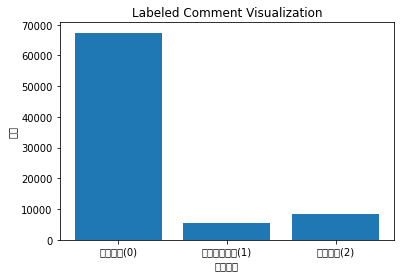

In [105]:
plt.title('Labeled Comment Visualization')
plt.bar(label_count_df['ÎåìÍ∏ÄÎ∂ÑÎ•ò'], label_count_df['Í∞úÏàò']) #ÏïûÏù¥ xÏ∂ï, Îí§Í∞Ä yÏ∂ï
plt.xlabel('ÎåìÍ∏ÄÎ∂ÑÎ•ò')
plt.ylabel('Í∞úÏàò')
plt.show()